# 1. Beginning the journey
---

#### Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

#### Importing and visualizing the training dataset

In [2]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
def dataframe_info(dataframe = pd.core.frame.DataFrame):
    print('These are the vairables in your DataFrame: \n----------------------------------------------------- \n')
    
    # Empty list for 'Numerical' and 'Categorical' variables
    numerical   = []
    categorical = []
    
    # Print variables, variable type, missing values, and unique values for Categorical variables
    for column in dataframe.columns:
        if dataframe[column].dtype in ['int64','float64']:
            numerical.append(str(column))
        else:
            categorical.append(str(column))
        
    print("Numerical variables in DataFrame: \n")
    [print("{} variable has {} missing values.".format(col,dataframe[col].isna().sum())) for col in numerical]
    print("\n")
    
    if len(categorical) > 0:
        print("Categorical variables in DataFrame: \n")
        [print("{} variable has {} unique values and {} missing values."
           .format(col,dataframe[col].nunique(),dataframe[col].isna().sum())) for col in categorical]
    else:
        print("There are no Categorical variables in DataFrame")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
dataframe_info(df)

These are the vairables in your DataFrame: 
----------------------------------------------------- 

Numerical variables in DataFrame: 

PassengerId variable has 0 missing values.
Survived variable has 0 missing values.
Pclass variable has 0 missing values.
Age variable has 177 missing values.
SibSp variable has 0 missing values.
Parch variable has 0 missing values.
Fare variable has 0 missing values.


Categorical variables in DataFrame: 

Name variable has 891 unique values and 0 missing values.
Sex variable has 2 unique values and 0 missing values.
Ticket variable has 681 unique values and 0 missing values.
Cabin variable has 147 unique values and 687 missing values.
Embarked variable has 3 unique values and 2 missing values.


#### Immediate modifications of the dataset. Immediately taking out the passengers that have missing embarked variable values (port in which the passenger embarked), due to its low cardinality and Nans. Later on it can be checked up whether it is relevant or not to determine if passengers survived

In [6]:
df.dropna(axis=0, subset=['Embarked'], inplace=True)
df.shape

(889, 12)

#### Separate the dependent variable (or target/label variable “y”)

In [7]:
y_temp = df.iloc[:,1].values
y = pd.DataFrame(y_temp.reshape(-1,1))
y.columns = ['Survived']

## 2. Dataset observations and insights
---

In [8]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,712.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,29.642093,0.524184,0.382452,32.096681
std,256.998173,0.486260,0.834700,14.492933,1.103705,0.806761,49.697504
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,20.000000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
# Categorical variables
cat_vars = df[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']]

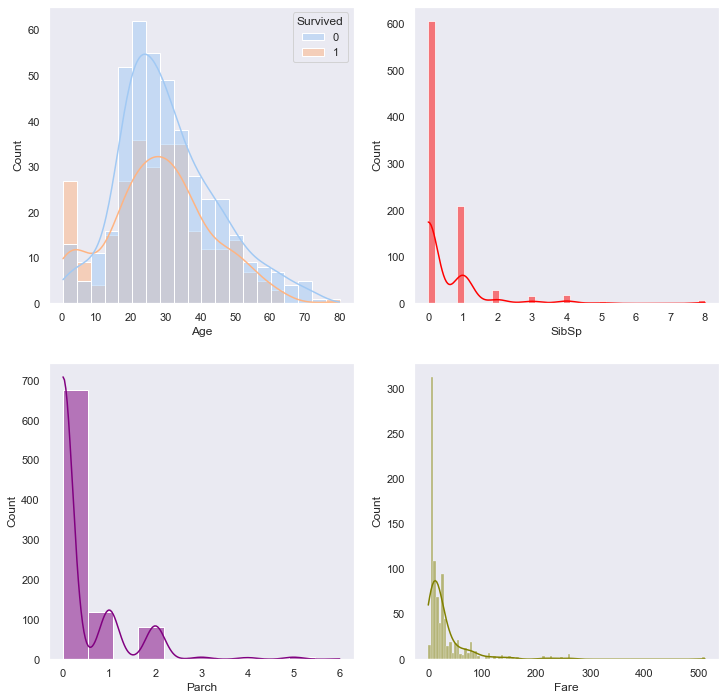

In [10]:
# Numerical variables
num_vars = df.select_dtypes(exclude=['object'])

sns.set_theme(style="dark", palette="pastel")
graph_num = num_vars

fig, axs = plt.subplots(2, 2, figsize=(12, 12))

sns.histplot(graph_num, x="Age", kde=True, hue='Survived', color="green", ax=axs[0, 0])
sns.histplot(graph_num, x="SibSp", kde=True, color="red", ax=axs[0, 1])
sns.histplot(graph_num, x="Parch", kde=True, color="purple", ax=axs[1, 0])
sns.histplot(graph_num, x="Fare", kde=True,color="olive", ax=axs[1, 1])

plt.show()

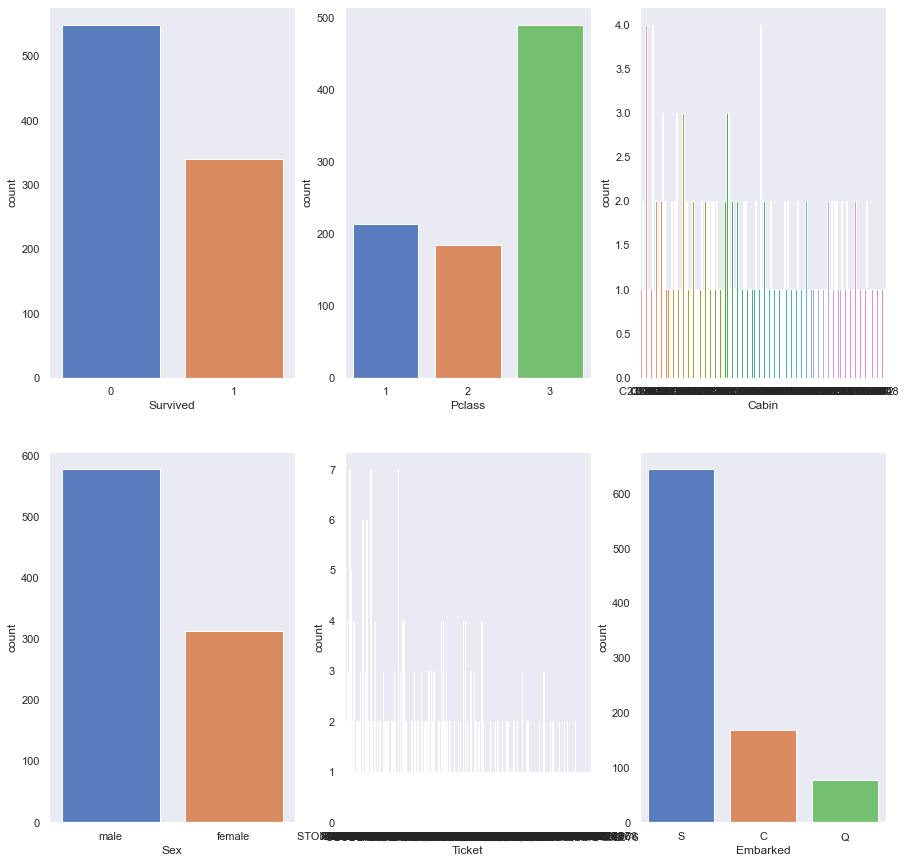

In [11]:
sns.set_theme(style="dark", palette="muted")
graph_cat = cat_vars

fig, axs = plt.subplots(2, 3, figsize=(15, 15))

sns.countplot(x='Survived', data=graph_cat, ax=axs[0,0]) #x='Survived',data =y, ax=axs[0,0]
sns.countplot(x="Pclass", data=graph_cat,ax=axs[0, 1])
sns.countplot(x="Sex", data=graph_cat, ax=axs[1, 0])
sns.countplot(x="Ticket", data=graph_cat, ax=axs[1, 1])
sns.countplot(x="Cabin", data=graph_cat, ax=axs[0, 2])
sns.countplot(x="Embarked", data=graph_cat, ax=axs[1, 2])

plt.show()

#### Variables Ticket and Cabin have a really high cardinality

#### Observations from numerical variables and low cardinality categorical variables

##### Survived

In [12]:
print("{} passengers sruvived, and {} didn't".format((y['Survived']==1).sum(),(y['Survived']==0).sum()))

340 passengers sruvived, and 549 didn't


##### Pclass (did rich people have higher odds of surviving?)

In [13]:
# Total of passengers that survived in different classes
pclass_survival = df.groupby('Pclass').sum()['Survived']
# Total of passengers in different classes
pclass_total = df['Pclass'].value_counts()
# Percentage of survival per class
pclass_percentage = (pclass_survival/pclass_total)
pclass_percentage

1    0.626168
2    0.472826
3    0.242363
dtype: float64

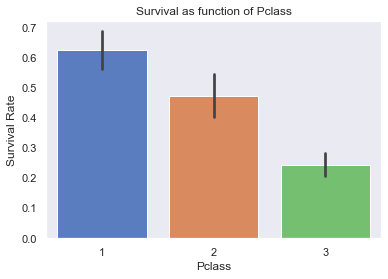

In [14]:
sns.barplot(x='Pclass', y='Survived', data=df)
plt.ylabel("Survival Rate")
plt.title("Survival as function of Pclass")
plt.show()

In [15]:
# Total of passengers that survived bases on their sex
sex_survival = df.groupby('Sex').sum()['Survived']
# Total female and male passengers 
sex_total = df['Sex'].value_counts()
# Sex percentage of survival
sex_percentage = (sex_survival/sex_total)
sex_percentage

female    0.740385
male      0.188908
dtype: float64

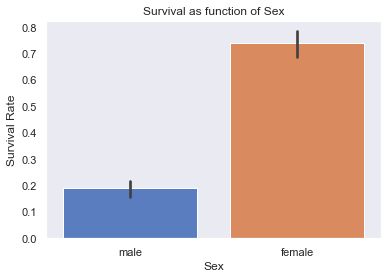

In [16]:
sns.barplot(x='Sex',y='Survived',data=df)
plt.ylabel("Survival Rate")
plt.title("Survival as function of Sex")
plt.show()

##### Age (Did underage people survive more than adults?)

In [17]:
def new_age(row):
    if row['Age'] <= 18 :
        return 'Underage'
    if row['Age'] > 18:
        return 'Adult'
    return 'Unknown'

In [18]:
df['Age_label'] = df.apply (lambda row: new_age(row), axis = 1)

In [19]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_label
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Adult


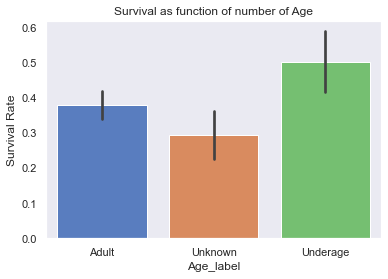

In [20]:
sns.barplot(x='Age_label',y='Survived',data=df)
plt.ylabel("Survival Rate")
plt.title("Survival as function of number of Age")
plt.show()

##### Sibsp (Did people with siblings or spouse have higher survival rates?)

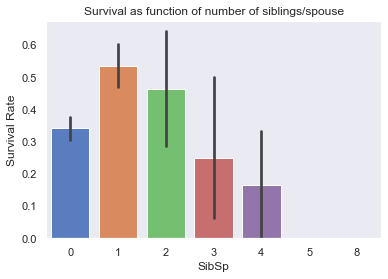

In [21]:
sns.barplot(x='SibSp',y='Survived',data=df)
plt.ylabel("Survival Rate")
plt.title("Survival as function of number of siblings/spouse")
plt.show()

##### Parch (Simillar with SibSp)

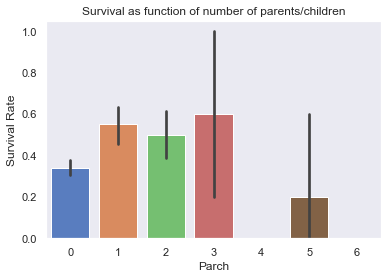

In [22]:
sns.barplot(x='Parch',y='Survived',data=df)
plt.ylabel("Survival Rate")
plt.title("Survival as function of number of parents/children")
plt.show()

#### It seems like both parch and sibsp are more dependent on sex than actually having family aboard. Females seem to have a higher number of family members aboard. 

##### Fare: As seen in the information of the dataset, percentile 75 and higher paid more than 31 dollars for their tickets. What classes were these passengers in and did they survive?

In [23]:
import math
q3 = df['Fare'].quantile(0.75)

In [24]:
# Passengers whos fare was >= 31 dollars (75th percentile)
fare_quant3_survival = df.groupby('Fare').quantile(q=0.75).sum()['Survived']
fare_quant3_survival = math.ceil(fare_quant3_survival)
fare_quant3_total = (df['Fare']>=q3).sum()
fare_quant3_percentage = fare_quant3_survival/fare_quant3_total

fare_quant3_percentage

0.57847533632287

In [25]:
# Passengers who paid less than 31 dollars and survived
fare_others_survival = df.groupby(df['Fare']<q3).sum()['Survived']
# Total passengers who paid less than 31 dollars
fare_others_total = df.groupby(df['Fare']<q3).count()['Survived']
fare_others_percentage = fare_others_survival/fare_others_total

fare_others_percentage[True]

0.31681681681681684

In [26]:
def new_fare(row):
    if row['Fare'] >= df['Fare'].quantile(0.75):
        return 'Fare >= 31'
    return 'Fare < 31'

In [27]:
df['Fare_label'] = df.apply (lambda row: new_fare(row), axis = 1)

In [28]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_label,Fare_label
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Adult,Fare < 31
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult,Fare >= 31
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adult,Fare < 31
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adult,Fare >= 31
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Adult,Fare < 31


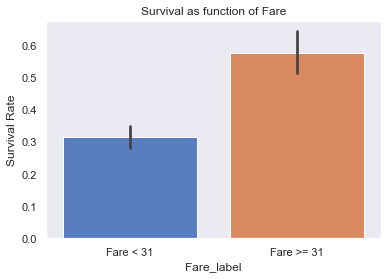

In [29]:
sns.barplot(x='Fare_label',y='Survived', data=df)
plt.ylabel("Survival Rate")
plt.title("Survival as function of Fare")
plt.show()

#### Embarked: This might not be useful, but its important to see if the port of embarkation has any relation whatsoever with survival

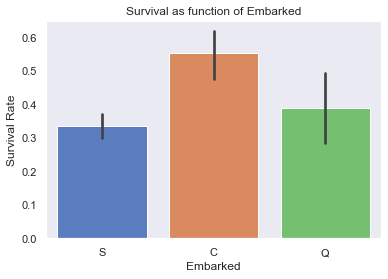

In [30]:
sns.barplot(x='Embarked',y='Survived', data=df)
plt.ylabel("Survival Rate")
plt.title("Survival as function of Embarked")
plt.show()

## Summary:
#### Sex is a major differentiator for passenger survival. Females had a 74% probability of survivng
#### 'Rich' people in terms of fare paid and passenger class had a higher probability of surviving
#### Underage people survived more than adults
#### Most of the variables survival probability could be explained in terms of sex. In some cases females would represent most (in some all) of the explained survivals. The other variables don't seem to be representative of passengers that survived, but they could be useful to explain non survivability
#### More thorough tests will be excecuted to see which variables have the highest impact on determining 'Survived' variable

## 3. Preprocessing and statistical analysis
---

#### One of the main ideas to model precisely the dataset is try to accurately predict the missing ages. Name variable and most of the numeric variables can be used for this task; Age will be predicted through iterative imputation (Deciding age based on the other variables)

In [31]:
#print(df['Name'].values)

#### It looks like adult names go with aliases "Mr." for males, "Mrs." for females, "Master" for male children, "Miss" for female children. Also some include "Don" for male children.

In [32]:
# Creating name label function based on the name honorific
def name_age(row):
    if 'Mr.' in row['Name']:
        return 'Adult'
    if 'Mrs.' in row['Name']:
        return 'Adult'
    if 'Don.' in row['Name']:
        return 'Adult'
    if 'Rev.' in row['Name']:
        return 'Adult'
    if 'Dr.' in row['Name']:
        return 'Adult'
    if 'Mme.' in row['Name']:
        return 'Adult'
    if 'Mlle.' in row['Name']:
        return 'Adult'
    if 'Ms.' in row['Name']:
        return 'Adult'
    if 'Lady.' in row['Name']:
        return 'Adult'
    if 'Sir.' in row['Name']:
        return 'Adult'
    if 'Major.' in row['Name']:
        return 'Adult'
    if 'Col.' in row['Name']:
        return 'Adult'
    if 'Capt.' in row['Name']:
        return 'Adult'
    if 'Countess.' in row['Name']:
        return 'Adult'
    if 'Jonkheer.' in row['Name']:
        return 'Adult'
    if 'Master.' in row['Name']:
        return 'Child'
    if 'Miss.' in row['Name']:
        return 'Child'

In [33]:
df['Name_Age_label'] = df.apply (lambda row: name_age(row), axis = 1)

In [34]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_label,Fare_label,Name_Age_label
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Adult,Fare < 31,Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult,Fare >= 31,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adult,Fare < 31,Child
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adult,Fare >= 31,Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Adult,Fare < 31,Adult


In [35]:
# Selecting numerical variables
age_variables = df.select_dtypes(exclude=[object])
age_variables = age_variables.drop(['PassengerId'],axis=1)
# Encoding name_age_label
name_age = (df['Name_Age_label'].values).reshape(-1,1)
name_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
encoded_names = pd.DataFrame(name_encoder.fit_transform(name_age))
encoded_names.columns = ['Adult','Child']
# Concatenating age_variables and encoded_names to impute age
imputer_df = pd.concat([age_variables,encoded_names], axis=1)

In [36]:
imputer_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Adult,Child
0,0.0,3.0,22.0,1.0,0.0,7.2500,1.0,0.0
1,1.0,1.0,38.0,1.0,0.0,71.2833,1.0,0.0
2,1.0,3.0,26.0,0.0,0.0,7.9250,0.0,1.0
3,1.0,1.0,35.0,1.0,0.0,53.1000,1.0,0.0
4,0.0,3.0,35.0,0.0,0.0,8.0500,1.0,0.0


#### For some reason, the concat function is adding 2 empty rows to the entire dataframe, so these will be erased

In [37]:
imputer_df.dropna(axis=0, subset=['Survived'], inplace=True)

In [38]:
# Since we won't be working with 'Survived' variable in the test dataset to impute age, we will take it out
imputer_final = imputer_df.drop(['Survived'], axis=1)

In [39]:
# Imputing age variable (iterative imputator)
imputer = IterativeImputer(missing_values=np.nan, random_state=0)
imputed = pd.DataFrame(imputer.fit_transform(imputer_final))
imputed.columns = imputer_final.columns
imputed.head()

,Pclass,Age,SibSp,Parch,Fare,Adult,Child
0,3.0,22.0,1.0,0.0,7.2500,1.0,0.0
1,1.0,38.0,1.0,0.0,71.2833,1.0,0.0
2,3.0,26.0,0.0,0.0,7.9250,0.0,1.0
3,1.0,35.0,1.0,0.0,53.1000,1.0,0.0
4,3.0,35.0,0.0,0.0,8.0500,1.0,0.0


In [40]:
def to_positive(row):
    return abs(row['Age'])

In [41]:
imputed['Age'] = imputed.apply(lambda row: to_positive(row), axis=1)

#### After checking some of the NaN replaced ages, it seems like some of them have issues:
#### 1) A small amount of ages were negative (these were simply taken care of by abs value and could still anyways damage the model)
#### 2) Some ages that should be replaced by adult ages (because of their honorific) were replaced by children ages
#### 3) Some ages that should be replaced by children ages (because of their honorific) were replaced by adult ages
#### Conclusion: Even though the iterative imputator was not perfect, its better than just handing out average ages for the missing values.
---

#### With this taken care of, proceeding with some statistical tests

          Pclass       Age     SibSp     Parch      Fare
Pclass  1.000000 -0.365902  0.081656  0.016824 -0.548193
Age    -0.365902  1.000000 -0.307351 -0.187896  0.093143
SibSp   0.081656 -0.307351  1.000000  0.414542  0.160887
Parch   0.016824 -0.187896  0.414542  1.000000  0.217532
Fare   -0.548193  0.093143  0.160887  0.217532  1.000000


<AxesSubplot:>

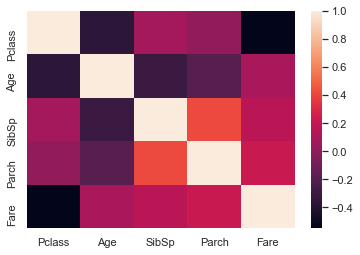

In [42]:
# Correlations of real numerical variables and Pclass
final_num_real = df[['Pclass','Age','SibSp','Parch','Fare']]
print(final_num_real.corr())
sns.heatmap(final_num_real.corr())

          Pclass       Age     SibSp     Parch      Fare
Pclass  1.000000 -0.398964  0.081656  0.016824 -0.548193
Age    -0.398964  1.000000 -0.342007 -0.211033  0.095416
SibSp   0.081656 -0.342007  1.000000  0.414542  0.160887
Parch   0.016824 -0.211033  0.414542  1.000000  0.217532
Fare   -0.548193  0.095416  0.160887  0.217532  1.000000


<AxesSubplot:>

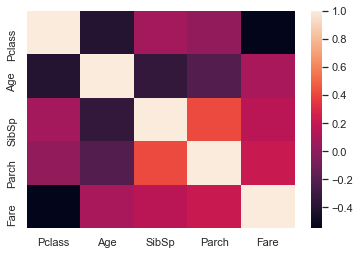

In [43]:
# Correlations of numerical variables with estimated age and Pclass
final_num_est = imputed[['Pclass','Age','SibSp','Parch','Fare']]
print(final_num_est.corr())
sns.heatmap(final_num_est.corr())

#### Newly estimated age variables dont impact the model. These numerical variables will stay for analysis. Also, there doesn't seem to be a high correlation between variables

#### Statistical significance of each numerical variable in the model (Are they good for describing survival?).

In [44]:
# Since our inital df has a ton of labels, a new df will be created
df2 = pd.read_csv('train.csv')
# Dropping the same 2 rows
df2.dropna(axis=0, subset=['Embarked'], inplace=True)

In [45]:
# Dropping survived as well
df2 = df2.drop(['Survived','PassengerId'], axis=1)

In [46]:
# Taking only low cardinality categorical variables to see their importance in the model
categorical_names = [column for column in df2.columns if df2[column].nunique() <= 5 and df2[column].dtype == 'object']
categorical_variables = df2[categorical_names]

In [47]:
# Encoding categorical variables
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
encoded_categoricals = pd.DataFrame(encoder.fit_transform(categorical_variables))

In [48]:
# By the results, column names are as follows: Female, Male, C, Q, S (C,Q,S are embarked)
encoded_categoricals.columns = ['Female','Male','C','Q','S']

In [49]:
# Concatenating dfs with the final data for analysis
x_full = pd.concat([final_num_est,encoded_categoricals],axis=1)
x_full.head()

,Pclass,Age,SibSp,Parch,Fare,Female,Male,C,Q,S
0,3.0,22.0,1.0,0.0,7.2500,0.0,1.0,0.0,0.0,1.0
1,1.0,38.0,1.0,0.0,71.2833,1.0,0.0,1.0,0.0,0.0
2,3.0,26.0,0.0,0.0,7.9250,1.0,0.0,0.0,0.0,1.0
3,1.0,35.0,1.0,0.0,53.1000,1.0,0.0,0.0,0.0,1.0
4,3.0,35.0,0.0,0.0,8.0500,0.0,1.0,0.0,0.0,1.0


#### Multicollinearity

In [50]:
# Using VIF to check if theres multicollinearity (Variables explaining others)
def get_vif(dataframe = pd.core.frame.DataFrame, target = str):
    dependent = dataframe[target]
    independent = dataframe.iloc[:,dataframe.columns != target]
    model_vif = sm.OLS(dependent,independent).fit()
    r_squared = model_vif.rsquared
    vif = (1 / (1-r_squared))
    print("Variance Inflation Factor of the variable '{}'= {} ".format(target,vif))

In [51]:
for item in x_full:
    get_vif(x_full,str(item))

Variance Inflation Factor of the variable 'Pclass'= 1.8601416838505263 
Variance Inflation Factor of the variable 'Age'= 1.3858713570491388 
Variance Inflation Factor of the variable 'SibSp'= 1.3499448045113955 
Variance Inflation Factor of the variable 'Parch'= 1.3308718209492838 
Variance Inflation Factor of the variable 'Fare'= 1.6489810600322359 
Variance Inflation Factor of the variable 'Female'= inf 
Variance Inflation Factor of the variable 'Male'= inf 
Variance Inflation Factor of the variable 'C'= inf 
Variance Inflation Factor of the variable 'Q'= inf 
Variance Inflation Factor of the variable 'S'= inf 


<ipython-input-50-ff781c82b6b4>:7: RuntimeWarning: divide by zero encountered in double_scalars
  vif = (1 / (1-r_squared))


#### Fortunately there doesn't seem to be multicollinearity between numerical variables (VIFs < 5). On the other hand, it seems like categorical variables are having multicollinearity issues. Most likely this is because  Sex explains the survivals of Embarked. Thus embarked is removed.

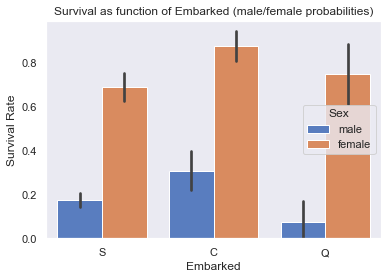

In [52]:
sns.barplot(x='Embarked',y='Survived', data=df, hue='Sex')
plt.ylabel("Survival Rate")
plt.title("Survival as function of Embarked (male/female probabilities)")
plt.show()

In [53]:
x_full = x_full.drop(['C','Q','S'], axis=1)

In [54]:
for item in x_full:
    get_vif(x_full,str(item))

Variance Inflation Factor of the variable 'Pclass'= 1.764725182128797 
Variance Inflation Factor of the variable 'Age'= 1.3795481828162828 
Variance Inflation Factor of the variable 'SibSp'= 1.3398220867247062 
Variance Inflation Factor of the variable 'Parch'= 1.3131970911755586 
Variance Inflation Factor of the variable 'Fare'= 1.59293992048853 
Variance Inflation Factor of the variable 'Female'= 11.776684959568842 
Variance Inflation Factor of the variable 'Male'= 22.4292912271978 


#### Variables Male and Female have a VIF > 5 which indicates multicollinearity, but sex won't be dropped off the model since its very usefull explaining whether passengers survived or not. This multicollinearity issue is most likely due to Sex (male/female) explaining a lot of variables in the model, as was with the case of Embarked. To illustrate this, here are some graphs showing survival probability of variables in terms of Sex:

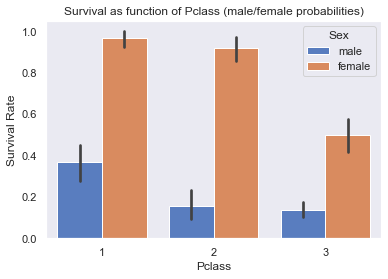

In [55]:
sns.barplot(x='Pclass',y='Survived', data=df, hue='Sex')
plt.ylabel("Survival Rate")
plt.title("Survival as function of Pclass (male/female probabilities)")
plt.show()

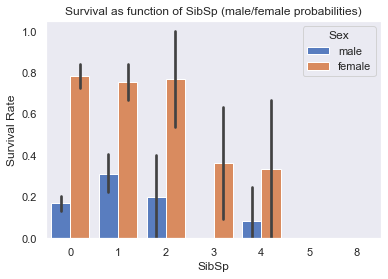

In [56]:
sns.barplot(x='SibSp',y='Survived', data=df, hue='Sex')
plt.ylabel("Survival Rate")
plt.title("Survival as function of SibSp (male/female probabilities)")
plt.show()

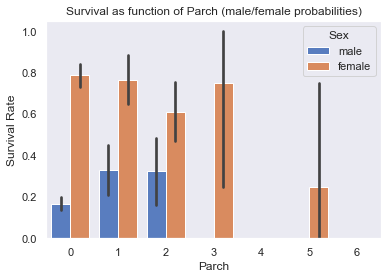

In [57]:
sns.barplot(x='Parch',y='Survived', data=df, hue='Sex')
plt.ylabel("Survival Rate")
plt.title("Survival as function of Parch (male/female probabilities)")
plt.show()

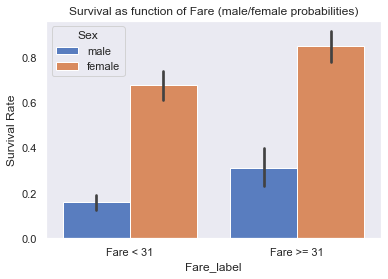

In [58]:
sns.barplot(x='Fare_label',y='Survived', data=df, hue='Sex')
plt.ylabel("Survival Rate")
plt.title("Survival as function of Fare (male/female probabilities)")
plt.show()

#### Being a female or a male explains most of the survivng/non survivng passengers than the actual Parch, Sibsp, Fare, Pclass, Embarked. This is why there are multicollinearity issues.

In [59]:
log_reg = sm.Logit(y,x_full).fit()
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.441263
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  889
Model:                          Logit   Df Residuals:                      882
Method:                           MLE   Df Model:                            6
Date:                Mon, 04 Oct 2021   Pseudo R-squ.:                  0.3367
Time:                        08:47:03   Log-Likelihood:                -392.28
converged:                       True   LL-Null:                       -591.41
Covariance Type:            nonrobust   LLR p-value:                 6.642e-83
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Pclass        -1.1776      0.146     -8.069      0.000      -1.464      -0.892
Age           -0.0443      0.

#### With a significance level of 5% (alpha  = 5%), all the variables except for Parch and Fare whos P-values exceed alpha (38.1% and 29.1%) are statistically significant to the model. They will be dropped in the model; changes in Fare or Parch aren't relevant for describing changes in survived.

In [60]:
log_reg_3 = sm.Logit(y,x_full[['Pclass','Age','SibSp','Female','Male']]).fit()
print(log_reg_3.summary())

Optimization terminated successfully.
         Current function value: 0.442199
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  889
Model:                          Logit   Df Residuals:                      884
Method:                           MLE   Df Model:                            4
Date:                Mon, 04 Oct 2021   Pseudo R-squ.:                  0.3353
Time:                        08:47:03   Log-Likelihood:                -393.11
converged:                       True   LL-Null:                       -591.41
Covariance Type:            nonrobust   LLR p-value:                 1.518e-84
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Pclass        -1.2561      0.127     -9.917      0.000      -1.504      -1.008
Age           -0.0447      0.

#### In the table above we can observe that Pclass, Age, SibSp, and Sex are statistically significant to the model. The pseudo R-Squared got a little bit smaller. Multicollinearity might still be an 'issue' but these variables will be the ones taken to the final model.

In [61]:
x_full_final = x_full[['Pclass','Age','SibSp','Female','Male']]

In [62]:
x_full_final.head()

,Pclass,Age,SibSp,Female,Male
0,3.0,22.0,1.0,0.0,1.0
1,1.0,38.0,1.0,1.0,0.0
2,3.0,26.0,0.0,1.0,0.0
3,1.0,35.0,1.0,1.0,0.0
4,3.0,35.0,0.0,0.0,1.0


#### Since embarked missing rows were taken out, a new dataset will be created, and these will be the definitive variables of the model.

In [63]:
# Importing dataset
final_df_train = pd.read_csv('train.csv')

In [64]:
type(final_df_train)

pandas.core.frame.DataFrame

In [65]:
# Creating name label function based on the name honorific
def name_age(row):
    if 'Mr.' in row['Name']:
        return 'Adult'
    if 'Mrs.' in row['Name']:
        return 'Adult'
    if 'Don.' in row['Name']:
        return 'Adult'
    if 'Rev.' in row['Name']:
        return 'Adult'
    if 'Dr.' in row['Name']:
        return 'Adult'
    if 'Mme.' in row['Name']:
        return 'Adult'
    if 'Mlle.' in row['Name']:
        return 'Adult'
    if 'Ms.' in row['Name']:
        return 'Adult'
    if 'Lady.' in row['Name']:
        return 'Adult'
    if 'Sir.' in row['Name']:
        return 'Adult'
    if 'Major.' in row['Name']:
        return 'Adult'
    if 'Col.' in row['Name']:
        return 'Adult'
    if 'Capt.' in row['Name']:
        return 'Adult'
    if 'Countess.' in row['Name']:
        return 'Adult'
    if 'Jonkheer.' in row['Name']:
        return 'Adult'
    if 'Master.' in row['Name']:
        return 'Child'
    if 'Miss.' in row['Name']:
        return 'Child'
    else:
        return 'Adult'

In [66]:
# Using the function to get the name label to impute age
final_df_train['label'] = final_df_train.apply(lambda row: name_age(row), axis = 1)

In [67]:
final_df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,label
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Child
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Adult


In [68]:
y_full_temp = final_df_train.iloc[:,1].values
y_full = pd.DataFrame(y_full_temp.reshape(-1,1))
y_full.columns = ['Survived']
y_full

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [69]:
# Selecting numerical variables
age_data = final_df_train.select_dtypes(exclude=[object])
age_data = age_data.drop(['PassengerId'],axis=1)
# Encoding name_age_label
child_or_adult = (final_df_train['label'].values).reshape(-1,1)
name_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
encoded_train_final = pd.DataFrame(name_encoder.fit_transform(child_or_adult))
encoded_train_final.columns = ['Adult','Child']
# Concatenating age_variables and encoded_names to impute age
imputer_train_final = pd.concat([age_data,encoded_train_final], axis=1)

In [70]:
imputer_train_final.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Adult,Child
0,0,3,22.0,1,0,7.2500,1.0,0.0
1,1,1,38.0,1,0,71.2833,1.0,0.0
2,1,3,26.0,0,0,7.9250,0.0,1.0
3,1,1,35.0,1,0,53.1000,1.0,0.0
4,0,3,35.0,0,0,8.0500,1.0,0.0


In [71]:
# Imputing age
imputer_train = IterativeImputer(missing_values=np.nan, random_state=0)
imputed_train = pd.DataFrame(imputer_train.fit_transform(imputer_train_final))
imputed_train.columns = imputer_train_final.columns
imputed_train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Adult,Child
0,0.0,3.0,22.0,1.0,0.0,7.2500,1.0,0.0
1,1.0,1.0,38.0,1.0,0.0,71.2833,1.0,0.0
2,1.0,3.0,26.0,0.0,0.0,7.9250,0.0,1.0
3,1.0,1.0,35.0,1.0,0.0,53.1000,1.0,0.0
4,0.0,3.0,35.0,0.0,0.0,8.0500,1.0,0.0


In [72]:
imputed_train['Age'] = imputed_train.apply(lambda row: to_positive(row), axis=1)

In [73]:
# Taking variables that will be used

# Encoding sex once again
sex_train = (final_df_train['Sex'].values).reshape(-1,1)
sex_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
sex_train_final = pd.DataFrame(sex_encoder.fit_transform(sex_train))
sex_train_final.columns = ['Female','Male']

In [74]:
sex_train_final.head()

,Female,Male
0,0.0,1.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,0.0,1.0


In [75]:
# Concatenating
definitive_x_train = pd.concat([imputed_train[['Pclass','Age','SibSp']],sex_train_final], axis=1)

In [76]:
definitive_x_train.head()

,Pclass,Age,SibSp,Female,Male
0,3.0,22.0,1.0,0.0,1.0
1,1.0,38.0,1.0,1.0,0.0
2,3.0,26.0,0.0,1.0,0.0
3,1.0,35.0,1.0,1.0,0.0
4,3.0,35.0,0.0,0.0,1.0


In [77]:
y_full.shape
y_full.to_csv('y_full_train.csv')

In [78]:
definitive_x_train.shape
definitive_x_train.to_csv('definitive_x_train.csv')

#### With this complete dataset we can now see the statistical significance of the variables in the model

#### With the data ready for modeling...

# 4) Modeling Phase
---

#### Feature scaling and splitting the train set to observe which model yields best result / analysis of each model implemented

#### Importing libraries for machine learning models

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

In [80]:
# Splitting training set and test set from x_full before jumping in with new data with no label
X_train, X_test, y_train, y_test = train_test_split(definitive_x_train, y_full, test_size = 0.20, random_state = 0)

In [81]:
# Feature scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [82]:
# Confusion Matrix function
def get_score(y_test, y_pred):
    cmat = confusion_matrix(y_test, y_pred)
    print('Accuracy: ',accuracy_score(y_test, y_pred))

#### Logistic Regression

In [83]:
log_classifier = LogisticRegression(random_state = 0)
log_classifier.fit(X_train,y_train.values.ravel())
y_pred_log = log_classifier.predict(X_test)
get_score(y_test,y_pred_log)

Accuracy:  0.8156424581005587


#### K-Nearest Neighbors

In [84]:
knn_classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn_classifier.fit(X_train,y_train.values.ravel())
y_pred_knn = knn_classifier.predict(X_test)
get_score(y_test,y_pred_knn)

Accuracy:  0.88268156424581


#### Support Vector Machine

In [85]:
svm_classifier = SVC(kernel = 'linear', random_state = 0)
svm_classifier.fit(X_train,y_train.values.ravel())
y_pred_svm = svm_classifier.predict(X_test)
get_score(y_test,y_pred_svm)

Accuracy:  0.7877094972067039


#### Kernel SVM

In [86]:
ksvm_classifier = SVC(kernel = 'rbf', random_state = 0)
ksvm_classifier.fit(X_train,y_train.values.ravel())
y_pred_ksvm = ksvm_classifier.predict(X_test)
get_score(y_test,y_pred_ksvm)

Accuracy:  0.8156424581005587


#### Naive Bayes

In [87]:
nb_classifier = GaussianNB()
nb_classifier.fit(X_train,y_train.values.ravel())
y_pred_nb = nb_classifier.predict(X_test)
get_score(y_test,y_pred_nb)

Accuracy:  0.7877094972067039


#### Random Forest Classification

In [88]:
rf_classifier = RandomForestClassifier(n_estimators = 500, criterion = 'entropy', random_state = 0)
rf_classifier.fit(X_train,y_train.values.ravel())
y_pred_rf = rf_classifier.predict(X_test)
get_score(y_test,y_pred_rf)

Accuracy:  0.8715083798882681


#### The best models for predicting the training set where Kernel SVM, K-Nearest Neighbors, Random Forest, and Multiple Logistic Regression. These will be used to discover the real test set

## 5) Deploying models for the test set
---

In [89]:
final_df_test = pd.read_csv('test.csv')
final_df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [90]:
final_df_test['label'] = final_df_test.apply(lambda row: name_age(row), axis = 1)

In [91]:
final_df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,label
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Adult
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Adult
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Adult
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Adult
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Adult


#### There are some issues with the honorific 'Miss'; in the test set, most of these are actually adult. Contrary to the training set

#### Repeating the process for age imputing

In [92]:
# Selecting numerical variables
age_data_test = final_df_test.select_dtypes(exclude=[object])
age_data_test = age_data_test.drop(['PassengerId'],axis=1)
# Encoding name_age_label
child_or_adult_test = (final_df_test['label'].values).reshape(-1,1)
name_encoder_test = OneHotEncoder(handle_unknown='ignore', sparse=False)
encoded_test_final = pd.DataFrame(name_encoder_test.fit_transform(child_or_adult_test))
encoded_test_final.columns = ['Adult','Child']
# Concatenating age_variables and encoded_names to impute age
imputer_test_final = pd.concat([age_data_test,encoded_test_final], axis=1)

In [93]:
encoded_test_final.head()

,Adult,Child
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0


In [94]:
imputer_test_final.head()

,Pclass,Age,SibSp,Parch,Fare,Adult,Child
0,3,34.5,0,0,7.8292,1.0,0.0
1,3,47.0,1,0,7.0000,1.0,0.0
2,2,62.0,0,0,9.6875,1.0,0.0
3,3,27.0,0,0,8.6625,1.0,0.0
4,3,22.0,1,1,12.2875,1.0,0.0


In [95]:
# Imputing age
imputer_test = IterativeImputer(missing_values=np.nan, random_state=0)
imputed_test = pd.DataFrame(imputer_test.fit_transform(imputer_test_final))
imputed_test.columns = imputer_test_final.columns
imputed_test.head()

,Pclass,Age,SibSp,Parch,Fare,Adult,Child
0,3.0,34.5,0.0,0.0,7.8292,1.0,0.0
1,3.0,47.0,1.0,0.0,7.0000,1.0,0.0
2,2.0,62.0,0.0,0.0,9.6875,1.0,0.0
3,3.0,27.0,0.0,0.0,8.6625,1.0,0.0
4,3.0,22.0,1.0,1.0,12.2875,1.0,0.0


In [96]:
imputed_test['Age'] = imputed_test.apply(lambda row: to_positive(row), axis=1)

In [97]:
# Taking variables that will be used

# Encoding sex once again
sex_test = (final_df_test['Sex'].values).reshape(-1,1)
sex_encoder_test = OneHotEncoder(handle_unknown='ignore', sparse=False)
sex_test_final = pd.DataFrame(sex_encoder_test.fit_transform(sex_test))
sex_test_final.columns = ['Female','Male']

In [98]:
sex_test_final.head()

,Female,Male
0,0.0,1.0
1,1.0,0.0
2,0.0,1.0
3,0.0,1.0
4,1.0,0.0


In [99]:
# Concatenating
definitive_x_test = pd.concat([imputed_test[['Pclass','Age','SibSp']],sex_test_final], axis=1)

In [100]:
definitive_x_test.head()

,Pclass,Age,SibSp,Female,Male
0,3.0,34.5,0.0,0.0,1.0
1,3.0,47.0,1.0,1.0,0.0
2,2.0,62.0,0.0,0.0,1.0
3,3.0,27.0,0.0,0.0,1.0
4,3.0,22.0,1.0,1.0,0.0


In [101]:
dataframe_info(definitive_x_test)

These are the vairables in your DataFrame: 
----------------------------------------------------- 

Numerical variables in DataFrame: 

Pclass variable has 0 missing values.
Age variable has 0 missing values.
SibSp variable has 0 missing values.
Female variable has 0 missing values.
Male variable has 0 missing values.


There are no Categorical variables in DataFrame


#### Using the 4 best models:

In [102]:
# Taking the entire x_train and y_train
entire_x_train = definitive_x_train
entire_y_train = y_full

In [103]:
entire_x_train.head()

,Pclass,Age,SibSp,Female,Male
0,3.0,22.0,1.0,0.0,1.0
1,1.0,38.0,1.0,1.0,0.0
2,3.0,26.0,0.0,1.0,0.0
3,1.0,35.0,1.0,1.0,0.0
4,3.0,35.0,0.0,0.0,1.0


In [104]:
entire_y_train.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [105]:
# Feature scaling
sc_test = StandardScaler()
X_train_final = sc_test.fit_transform(entire_x_train)
X_test_final = sc_test.transform(definitive_x_test)

#### Multiple Logistic Regression

In [106]:
log_classifier_test = LogisticRegression(random_state = 0)
log_classifier_test.fit(X_train_final,entire_y_train.values.ravel())
y_pred_log_final = log_classifier_test.predict(X_test_final)

In [107]:
y_pred_log_final = pd.DataFrame((y_pred_log_final.reshape(-1,1)))
y_pred_log_final

,0
0,0
1,0
2,0
3,0
4,1
...,...
413,0
414,1
415,0
416,0


In [108]:
# Concatenating the passengers and predictions
log_results = pd.concat([final_df_test[['PassengerId']],y_pred_log_final],axis=1)
log_results.head()

,PassengerId,0
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [109]:
log_results.to_csv('Multiple_Logistic_Regression.csv')

# Multiple Logistic Regression Score = 76.1%

#### KNN

In [110]:
knn_classifier_test = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn_classifier_test.fit(X_train_final,entire_y_train.values.ravel())
y_pred_knn_final = knn_classifier_test.predict(X_test_final)

In [111]:
y_pred_knn_final = pd.DataFrame((y_pred_knn_final.reshape(-1,1)))

In [112]:
knn_results = pd.concat([final_df_test[['PassengerId']],y_pred_knn_final],axis=1)
knn_results.head()

,PassengerId,0
0,892,0
1,893,0
2,894,0
3,895,1
4,896,1


In [113]:
knn_results.to_csv('K-Nearest Neighbors.csv')

# K Nearest Neighbors Score = 68.1%

#### Kernel SVM

In [114]:
ksvm_classifier_final = SVC(kernel = 'rbf', random_state = 0)
ksvm_classifier_final.fit(X_train_final,entire_y_train.values.ravel())
y_pred_ksvm_final = ksvm_classifier_final.predict(X_test_final)

In [115]:
y_pred_ksvm_final = pd.DataFrame((y_pred_ksvm_final.reshape(-1,1)))

In [116]:
ksvm_results = pd.concat([final_df_test[['PassengerId']],y_pred_ksvm_final],axis=1)
ksvm_results.head()

,PassengerId,0
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [122]:
ksvm_results.to_csv('Kernel Support Vector Machine.csv')

# Kernel Support Vector Machine Score = 78.2%

#### Random Forest

In [118]:
rf_classifier_final = RandomForestClassifier(n_estimators = 500, criterion = 'entropy', random_state = 0)
rf_classifier_final.fit(X_train_final,entire_y_train.values.ravel())
y_pred_rf_final = rf_classifier_final.predict(X_test_final)

In [119]:
y_pred_rf_final = pd.DataFrame((y_pred_rf_final.reshape(-1,1)))

In [120]:
rf_results = pd.concat([final_df_test[['PassengerId']],y_pred_rf_final],axis=1)
rf_results.head()

,PassengerId,0
0,892,0
1,893,0
2,894,1
3,895,1
4,896,0


In [121]:
rf_results.to_csv('Random Forest.csv')

## References used for this proyect
#### Thank you for letting me learn so much about your models
- https://www.linkedin.com/pulse/what-i-learned-analyzing-famous-titanic-dateset-murilo-gustineli
- https://www.kaggle.com/kenjee/titanic-project-example
- https://github.com/murilogustineli/Titanic-Classification/blob/6a3d12691aa17bf7bdf6a2e68a8f4d15a23fa53e/Titanic%20Project.ipynb

## Random Forest Score = 69.4%